# 📘 Deskripsi Dataset

Dataset yang digunakan dalam penelitian ini diperoleh melalui proses web scraping terhadap ulasan pengguna aplikasi BRImo di Google Play Store. BRImo merupakan aplikasi mobile banking resmi dari Bank Rakyat Indonesia (BRI) yang menyediakan berbagai layanan perbankan digital.

Dataset ini terdiri dari ulasan teks yang mencerminkan pengalaman, keluhan, dan apresiasi pengguna terhadap aplikasi BRImo. Dataset yang digunakan dalam penelitian ini diperoleh melalui proses web scraping terhadap ulasan pengguna aplikasi BRImo di Google Play Store. Dataset ini disimpan dalam format CSV dan memiliki struktur sebagai berikut:

- **reviewId**: ID unik untuk setiap ulasan.
- **userName**: Nama pengguna yang memberikan ulasan.
- **userImage**: Foto profil yang memberikan ulasan.
- **content**: Teks ulasan yang diberikan oleh pengguna.
- **score**: Nilai bintang yang diberikan oleh yang memberikan ulasan terhadap aplikasi (1 hingga 5 bintang).
- **thumbsUpCount**: Jumlah like yang dimiliki ulasan.
- **reviewCreatedVersion**: Versi saat ulasan diberikan.
- **at**: Waktu saat ulasan diberikan.
- **replyContent**: Balasan oleh pemilik aplikasi terhadap ulasan .
- **repliedAt**: Waktu saat balasan ulasan diterima
- **appVersion**: Versi aplikasi

# 1. Import Library

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
 
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Conv1D, Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from sklearn.preprocessing import LabelEncoder

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
import datetime as dt  # Untuk manipulasi tanggal dan waktu
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('stopwords')
nltk.download('wordnet')

import emoji
import csv
import requests
from io import StringIO

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Loading Dataset

In [2]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
DataFrame = pd.read_csv('ulasan_aplikasi.csv')
DataFrame.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2736d887-b1d6-41e2-821b-21526ed2e816,Olivia Agnes,https://play-lh.googleusercontent.com/a/ACg8oc...,🤜🤛,5,0,2.80.0,2025-04-09 22:02:21,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-10 06:03:43,2.80.0
1,75c225c0-2ca8-4941-b827-a25afaa4469e,Risal,https://play-lh.googleusercontent.com/a-/ALV-U...,jadi simple dalam transaksi,5,0,2.81.0,2025-04-09 22:01:59,Terima kasih atas ulasannya. Semoga aplikasi B...,2025-04-09 22:43:12,2.81.0
2,f9883af8-4b63-490d-a449-9a9d4b30ee01,Chaca Natasya,https://play-lh.googleusercontent.com/a-/ALV-U...,BRI tidak bisa di update,5,0,2.62.0,2025-04-09 22:01:43,"Hai Sobat BRI, mohon maaf atas kendala BRImo y...",2025-04-10 06:05:05,2.62.0
3,715d52bf-60aa-4b40-ae9f-aa44e7a84e93,Sujat Moko,https://play-lh.googleusercontent.com/a/ACg8oc...,blm update,3,0,2.81.0,2025-04-09 21:59:24,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-04-09 22:33:26,2.81.0
4,fee3f840-672f-4c19-821f-29209ee2746e,Daniel Rikardo,https://play-lh.googleusercontent.com/a-/ALV-U...,ok,5,0,NaN,2025-04-09 21:50:01,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-09 21:59:32,NaN


In [3]:
DataFrame.info()  # Menampilkan informasi tentang DataFrame, termasuk tipe data dan jumlah nilai non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              20099 non-null  object
 1   userName              20099 non-null  object
 2   userImage             20099 non-null  object
 3   content               20099 non-null  object
 4   score                 20099 non-null  int64 
 5   thumbsUpCount         20099 non-null  int64 
 6   reviewCreatedVersion  16663 non-null  object
 7   at                    20099 non-null  object
 8   replyContent          19588 non-null  object
 9   repliedAt             19588 non-null  object
 10  appVersion            16663 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.7+ MB


In [4]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = DataFrame.dropna()

In [5]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()
 
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16242 entries, 0 to 20098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16242 non-null  object
 1   userName              16242 non-null  object
 2   userImage             16242 non-null  object
 3   content               16242 non-null  object
 4   score                 16242 non-null  int64 
 5   thumbsUpCount         16242 non-null  int64 
 6   reviewCreatedVersion  16242 non-null  object
 7   at                    16242 non-null  object
 8   replyContent          16242 non-null  object
 9   repliedAt             16242 non-null  object
 10  appVersion            16242 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


# 3. Preprocessing Text

In [7]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = emoji.replace_emoji(text, replace='')  # menghapus semua emoji
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [8]:
slangwords = {
    "@": "di", 
    "abis": "habis", 
    "wtb": "beli", 
    "masi": "masih", 
    "wts": "jual", 
    "wtt": "tukar", 
    "bgt": "banget", 
    "maks": "maksimal",
    'bgt': 'banget',
    'gk': 'tidak',
    'g': 'tidak',
    'ga': 'tidak',
    'gt': 'begitu',
    'tp': 'tapi',
    'dpt': 'dapat',
    'lg': 'lagi',
    'km': 'kamu',
    'sy': 'saya',
    'dr': 'dari',
    'krn': 'karena',
    'sm': 'sama',
    'trus': 'terus',
    'udh': 'sudah',
    'blm': 'belum',
    'mo': 'mau',
    'aj': 'saja',
    'aja': 'saja',
    'jd': 'jadi',
    'ngga': 'tidak',
    'bkn': 'bukan',
    'mager': 'malas',
    'gabut': 'bosan',
    'alay': 'norak',
    'woles': 'santai',
    'sotoy': 'sok tahu',
    'cuan': 'untung',
    'halu': 'halusinasi',
    'receh': 'garing',
    'lmbt': 'lambat',
    'ngelag': 'lambat',
    'lag': 'lambat',
    'eror': 'error',
    'erorr': 'error',
    'crash': 'error',
    'stuck': 'macet',
    'delay': 'tertunda',
    'gud': 'bagus',
    'gudjob': 'kerja bagus',
    'bgs': 'bagus',
    'bgus': 'bagus',
    'kren': 'keren',
    'cntk': 'cantik',
    'ctk': 'cantik',
    'cakep': 'cantik',
    'jlek': 'jelek',
    'cepet': 'cepat',
    'cpt': 'cepat',
    'yg': 'yang',
    'bagu': 'bagus',
    'bagusss': 'bagus',
    }
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [9]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [10]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,2736d887-b1d6-41e2-821b-21526ed2e816,Olivia Agnes,https://play-lh.googleusercontent.com/a/ACg8oc...,🤜🤛,5,0,2.80.0,2025-04-09 22:02:21,"Hai Sobat BRI, terima kasih atas ulasannya. Se...",2025-04-10 06:03:43,2.80.0,,,,[],[],
1,75c225c0-2ca8-4941-b827-a25afaa4469e,Risal,https://play-lh.googleusercontent.com/a-/ALV-U...,jadi simple dalam transaksi,5,0,2.81.0,2025-04-09 22:01:59,Terima kasih atas ulasannya. Semoga aplikasi B...,2025-04-09 22:43:12,2.81.0,jadi simple dalam transaksi,jadi simple dalam transaksi,jadi simple dalam transaksi,"[jadi, simple, dalam, transaksi]","[simple, transaksi]",simple transaksi
2,f9883af8-4b63-490d-a449-9a9d4b30ee01,Chaca Natasya,https://play-lh.googleusercontent.com/a-/ALV-U...,BRI tidak bisa di update,5,0,2.62.0,2025-04-09 22:01:43,"Hai Sobat BRI, mohon maaf atas kendala BRImo y...",2025-04-10 06:05:05,2.62.0,BRI tidak bisa di update,bri tidak bisa di update,bri tidak bisa di update,"[bri, tidak, bisa, di, update]","[bri, update]",bri update
3,715d52bf-60aa-4b40-ae9f-aa44e7a84e93,Sujat Moko,https://play-lh.googleusercontent.com/a/ACg8oc...,blm update,3,0,2.81.0,2025-04-09 21:59:24,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-04-09 22:33:26,2.81.0,blm update,blm update,belum update,"[belum, update]",[update],update
6,5c956de2-6b82-4b57-ae2e-5a7af2d2bb01,Ayra Abcd,https://play-lh.googleusercontent.com/a/ACg8oc...,punya saya kok aplikasi brimo suruh update tru...,3,0,2.80.0,2025-04-09 21:48:58,"Hai Sobat BRI, mohon maaf atas ketidaknyamanan...",2025-04-09 21:59:40,2.80.0,punya saya kok aplikasi brimo suruh update tru...,punya saya kok aplikasi brimo suruh update tru...,punya saya kok aplikasi brimo suruh update ter...,"[punya, saya, kok, aplikasi, brimo, suruh, upd...","[aplikasi, brimo, suruh, update, yamasa, suruh...",aplikasi brimo suruh update yamasa suruh update


# 4. Pelabelan

In [11]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [12]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
def sentiment_analysis_lexicon_indonesia(text):
    # Inisialisasi skor sentimen ke 0
    score = 0
    #for word in text:
    for word in text:
        # Mengulangi setiap kata dalam teks
        if (word in lexicon_positive):
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
            score = score + lexicon_positive[word]
    # Mengulangi setiap kata dalam teks (sekali lagi)
    for word in text:
        if (word in lexicon_negative):
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
            score = score + lexicon_negative[word]
    # Inisialisasi variabel polaritas
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    # Mengembalikan skor sentimen dan polaritas teks
    return score, polarity

# 5. Eksplorasi Label

In [13]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    7644
negative    4433
neutral     4165
Name: count, dtype: int64


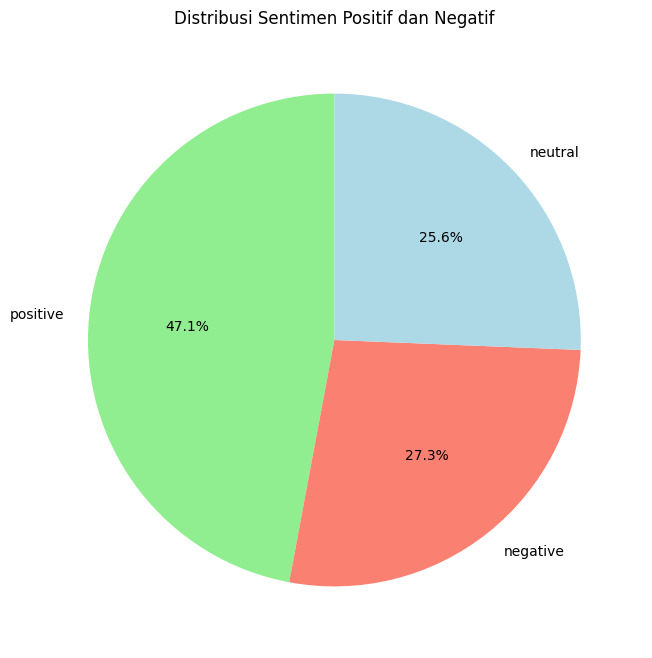

In [14]:
# Count the number of positive and negative labels
label_counts = clean_df['polarity'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon', 'lightblue'])
plt.title('Distribusi Sentimen Positif dan Negatif')
plt.show()

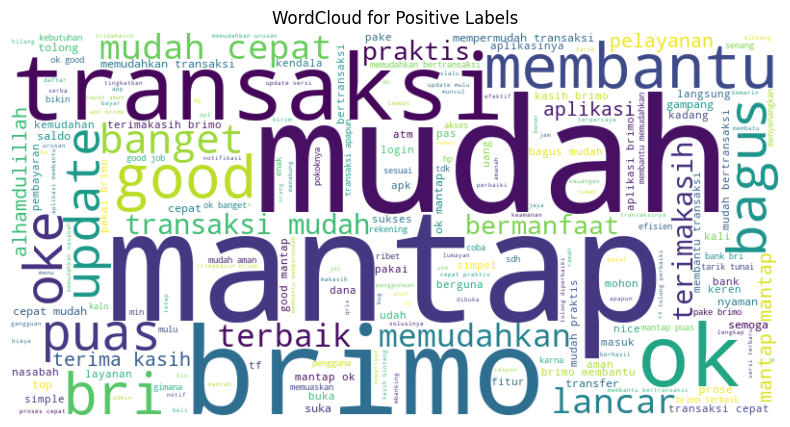

In [15]:
# Filter the dataset for positive labels
positive_labels = ' '.join(clean_df[clean_df['polarity'] == 'positive']['text_akhir'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_labels)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Labels')
plt.show()

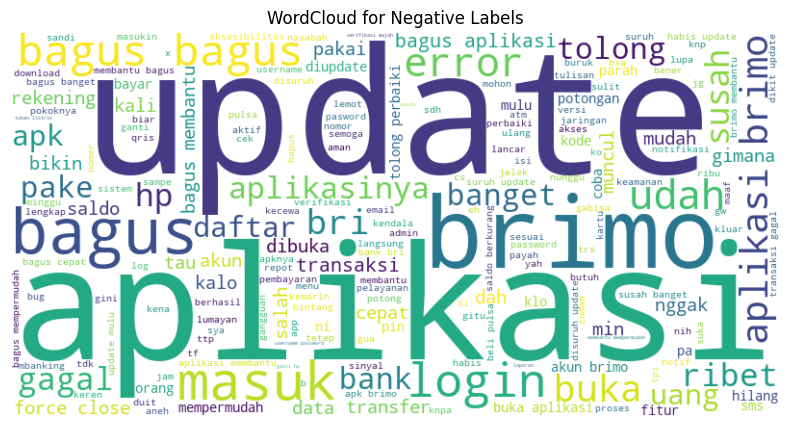

In [16]:
# Filter the dataset for negative labels
negative_labels = ' '.join(clean_df[clean_df['polarity'] == 'negative']['text_akhir'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(negative_labels)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Labels')
plt.show()

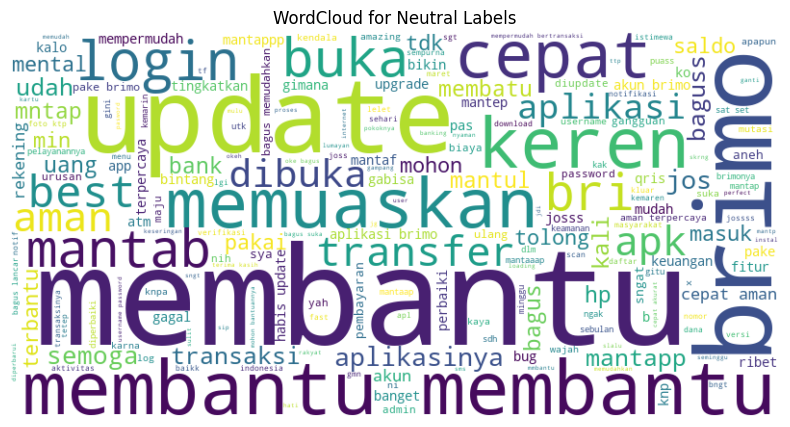

In [17]:
# Filter the dataset for neutral labels
neutral_labels = ' '.join(clean_df[clean_df['polarity'] == 'neutral']['text_akhir'])

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(neutral_labels)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Labels')
plt.show()

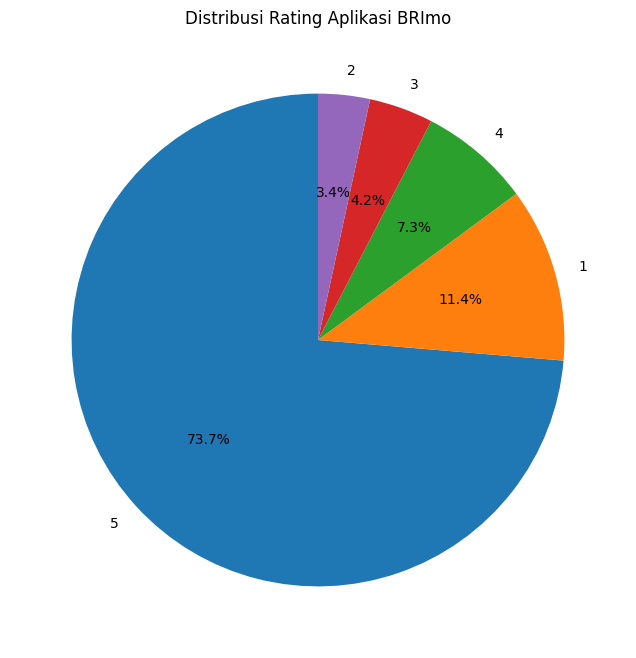

In [18]:
# Count the number of positive and negative labels
label_counts = clean_df['score'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Rating Aplikasi BRImo')
plt.show()

In [19]:
def label_dataframe(df, option='neutral'):
    # Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
    pd.set_option('display.max_colwidth', 3000)

    # Membuat DataFrame baru yang hanya berisi tweet dengan polaritas tertentu.
    reviews = df[df['polarity'] == option]

    # Memilih hanya kolom-kolom tertentu dari DataFrame 'reviews'.
    reviews = reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

    # Mengurutkan DataFrame 'reviews' berdasarkan 'polarity_score' secara menurun.
    reviews = reviews.sort_values(by='polarity_score', ascending=False)

    # Mengatur ulang indeks DataFrame agar dimulai dari 0.
    reviews = reviews.reset_index(drop=True)
    reviews.index += 1

    return reviews

In [20]:
positive_reviews = label_dataframe(clean_df, 'positive')

positive_reviews.head()

,text_akhir,polarity_score,polarity,text_stopword
1,jujur aman mudan nyaman amanah damai smoga slalu berjaya sukses slalu mengembangkan penggunaan brimo bnk bri kenyamanan sluruh rakyat indonesia trimakasih usahakan pinjaman pngajuan rb rb usahakan acc masyarakat indonesia nyaman hatinya,32,positive,"[jujur, aman, mudan, nyaman, amanah, damai, smoga, slalu, berjaya, sukses, slalu, mengembangkan, penggunaan, brimo, bnk, bri, kenyamanan, sluruh, rakyat, indonesia, trimakasih, usahakan, pinjaman, pngajuan, rb, rb, usahakan, acc, masyarakat, indonesia, nyaman, hatinya]"
2,alhamdulillah penggunaan pasilitas brimo cepat mudah perjalanan penggunaan terima kasih brimo mudah mudahan bertahan membutuhkan kesulitan penggunaannya kiriman keperluan kebutuhan perlukan terimakasih brimo yamudah mudahan terputus pasilitas kiriman terbaru,31,positive,"[alhamdulillah, penggunaan, pasilitas, brimo, cepat, mudah, perjalanan, penggunaan, terima, kasih, brimo, mudah, mudahan, bertahan, membutuhkan, kesulitan, penggunaannya, kiriman, keperluan, kebutuhan, perlukan, terimakasih, brimo, yamudah, mudahan, terputus, pasilitas, kiriman, terbaru]"
3,transaksi sampe jam proses selesai mengajukan aduan respon sebelum²nya emang lancar transfer atm top gopay top dana lancar tau knp transaksi pulsa jam prosesan kelar bikin aduan cuman respon aduan proses ffiiiuuhh ntahlah,26,positive,"[transaksi, sampe, jam, proses, selesai, mengajukan, aduan, respon, sebelum²nya, emang, lancar, transfer, atm, top, gopay, top, dana, lancar, tau, knp, transaksi, pulsa, jam, prosesan, kelar, bikin, aduan, cuman, respon, aduan, proses, ffiiiuuhh, ntahlah]"
4,awas hati transaksi via brimomenggungunakan qrissaldo kembalisaldo kepotongtapi status transaksi proses trussudah lapor pusat bantuan jawabanya ajaadmin dasdespengembalian dana maxsimal hri kerja katanyanyatanya skarang hri lebihsaldo blum kembalimaaf belepotancuma berbagi pengalaman,25,positive,"[awas, hati, transaksi, via, brimomenggungunakan, qrissaldo, kembalisaldo, kepotongtapi, status, transaksi, proses, trussudah, lapor, pusat, bantuan, jawabanya, ajaadmin, dasdespengembalian, dana, maxsimal, hri, kerja, katanyanyatanya, skarang, hri, lebihsaldo, blum, kembalimaaf, belepotancuma, berbagi, pengalaman]"
5,berhasil aktivasi brimo fitur status finansial aktifkan transaksi menerima email berhasil aktifkan finansial heran akun rekening produk simpedes tayangan slide cepat hitungan detik tutupi formulir tabungan impian mohon diperbaiki transaksi belanja online,25,positive,"[berhasil, aktivasi, brimo, fitur, status, finansial, aktifkan, transaksi, menerima, email, berhasil, aktifkan, finansial, heran, akun, rekening, produk, simpedes, tayangan, slide, cepat, hitungan, detik, tutupi, formulir, tabungan, impian, mohon, diperbaiki, transaksi, belanja, online]"


In [21]:
negative_reviews = label_dataframe(clean_df, 'negative')

negative_reviews.head()

,text_akhir,polarity_score,polarity,text_stopword
1,aplikasinya bagus banget,-1,negative,"[aplikasinya, bagus, banget]"
2,yah x buka mbanking disuruh update mulu mbanking ngg gtu deh kyanya,-1,negative,"[yah, x, buka, mbanking, disuruh, update, mulu, mbanking, ngg, gtu, deh, kyanya]"
3,update aplikasi perbaikan signifikan,-1,negative,"[update, aplikasi, perbaikan, signifikan]"
4,aplikasi brimo bagus mantap,-1,negative,"[aplikasi, brimo, bagus, mantap]"
5,habis update force close mulu yak buka,-1,negative,"[habis, update, force, close, mulu, yak, buka]"


In [22]:
neutral_reviews = label_dataframe(clean_df, 'neutral')
neutral_reviews.head()

,text_akhir,polarity_score,polarity,text_stopword
1,mantul,0,neutral,[mantul]
2,,0,neutral,[]
3,bri update,0,neutral,"[bri, update]"
4,update,0,neutral,[update]
5,,0,neutral,[]


# 6. Features Extraction & Data Split

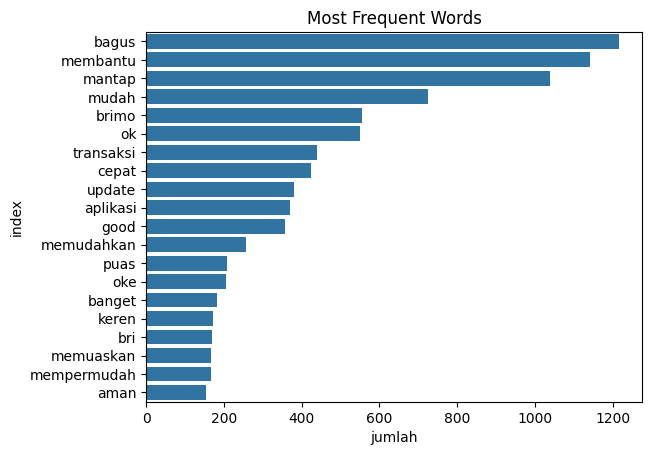

In [23]:
# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [24]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,akses,aksesibilitas,aktif,akun,alhamdulillah,aman,aneh,apapun,apk,...,udah,ulang,update,urusan,user,username,verifikasi,versi,wajah,yah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.638255,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.473040,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Bagi data menjadi data latih dan data uji, parameter stratify memastikan kelas target dengan proporsi sesuai data awal
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# 7. Machine Learning Modelling

In [26]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.8467636419610559
Naive Bayes - accuracy_test: 0.845183133271776


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9615177403217117
Random Forest - accuracy_test: 0.8950446291166513


In [28]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9119525898560763
Logistic Regression - accuracy_test: 0.9128962757771623


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9615177403217117
Decision Tree - accuracy_test: 0.8771929824561403


# 8. Modelling Deep Learning

In [30]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_df['text_akhir'])

# Get the word index
word_index = tokenizer.word_index
print(f"Number of unique words: {len(word_index)}")

# Get the word frequencies
word_counts = tokenizer.word_counts
print(f"Top 10 most common words: {list(word_counts.items())[:10]}")

Number of unique words: 8284
Top 10 most common words: [('simple', 94), ('transaksi', 1232), ('bri', 645), ('update', 1557), ('aplikasi', 1348), ('brimo', 2434), ('suruh', 87), ('yamasa', 1), ('mantap', 1303), ('terbaik', 187)]


In [31]:
# Calculate the lengths of the texts
text_lengths = clean_df['text_akhir'].apply(lambda x: len(x.split()))

# Print some statistics
print(f"Average text length: {text_lengths.mean()}")
print(f"Median text length: {text_lengths.median()}")
print(f"Max text length: {text_lengths.max()}")

Average text length: 3.9177441201822436
Median text length: 2.0
Max text length: 58


In [32]:
num_words = len(word_index) + 10  # Covering unique words
maxlen = text_lengths.max() + 10  # Covering max length of the text

In [33]:
X = clean_df['text_akhir']
y = clean_df['polarity']

# Convert labels to categorical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [34]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_tokenized, maxlen=maxlen)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

In [36]:
model_cnn = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

history_cnn = model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7105 - loss: 0.6485 - val_accuracy: 0.9211 - val_loss: 0.2247
Epoch 2/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9547 - loss: 0.1319 - val_accuracy: 0.9361 - val_loss: 0.1805
Epoch 3/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9768 - loss: 0.0647 - val_accuracy: 0.9357 - val_loss: 0.2073
Epoch 4/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9848 - loss: 0.0422 - val_accuracy: 0.9300 - val_loss: 0.2272
Epoch 5/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9899 - loss: 0.0267 - val_accuracy: 0.9315 - val_loss: 0.2767


In [37]:
# Evaluasi akurasi model CNN
_, accuracy_train_cnn = model_cnn.evaluate(X_train, y_train)
_, accuracy_test_cnn = model_cnn.evaluate(X_test, y_test)

# Menampilkan akurasi
print('Deep Learning (CNN) - accuracy_train:', accuracy_train_cnn)
print('Deep Learning (CNN) - accuracy_test:', accuracy_test_cnn)

407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9947 - loss: 0.0187
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9190 - loss: 0.3197 
Deep Learning (CNN) - accuracy_train: 0.9832987189292908
Deep Learning (CNN) - accuracy_test: 0.9221298694610596


In [38]:
model_bilstm = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(128)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

history_bilstm = model_bilstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.7030 - loss: 0.6600 - val_accuracy: 0.9223 - val_loss: 0.2138
Epoch 2/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 34s 105ms/step - accuracy: 0.9581 - loss: 0.1209 - val_accuracy: 0.9307 - val_loss: 0.1992
Epoch 3/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 34s 106ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9304 - val_loss: 0.2082
Epoch 4/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 35s 107ms/step - accuracy: 0.9875 - loss: 0.0347 - val_accuracy: 0.9319 - val_loss: 0.2482
Epoch 5/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9219 - val_loss: 0.2808


In [39]:
# Evaluasi akurasi model BiLSTM
_, accuracy_train_bilstm = model_bilstm.evaluate(X_train, y_train)
_, accuracy_test_bilstm = model_bilstm.evaluate(X_test, y_test)

# Menampilkan akurasi
print('Deep Learning (BiLSTM) - accuracy_train:', accuracy_train_bilstm)
print('Deep Learning (BiLSTM) - accuracy_test:', accuracy_test_bilstm)

407/407 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9887 - loss: 0.0321
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9269 - loss: 0.2719
Deep Learning (BiLSTM) - accuracy_train: 0.9762179851531982
Deep Learning (BiLSTM) - accuracy_test: 0.92336106300354


In [40]:
model_rnn_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])

model_rnn_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_lstm.summary()

history_bilstm = model_rnn_lstm.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.6672 - loss: 0.7214 - val_accuracy: 0.9104 - val_loss: 0.2440
Epoch 2/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9455 - loss: 0.1628 - val_accuracy: 0.9292 - val_loss: 0.2075
Epoch 3/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.9743 - loss: 0.0820 - val_accuracy: 0.9319 - val_loss: 0.2048
Epoch 4/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.9848 - loss: 0.0474 - val_accuracy: 0.9307 - val_loss: 0.2443
Epoch 5/5
325/325 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.9878 - loss: 0.0350 - val_accuracy: 0.9334 - val_loss: 0.2408


In [41]:
# Evaluasi akurasi model RNN LSTM
_, accuracy_train_rnn_lstm = model_rnn_lstm.evaluate(X_train, y_train)
_, accuracy_test_rnn_lstm = model_rnn_lstm.evaluate(X_test, y_test)

# Menampilkan akurasi
print('Deep Learning (RNN LSTM) - accuracy_train:', accuracy_train_rnn_lstm)
print('Deep Learning (RNN LSTM) - accuracy_test:', accuracy_test_rnn_lstm)

407/407 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9920 - loss: 0.0256
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9313 - loss: 0.2486
Deep Learning (RNN LSTM) - accuracy_train: 0.9813745617866516
Deep Learning (RNN LSTM) - accuracy_test: 0.9245921969413757


# 9. Pemilihan Model dengan Akurasi Tertinggi

In [42]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree', 'CNN', 'Bi-LSTM', 'Recurrent Neural Network - LSTM'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt, accuracy_train_cnn, accuracy_train_bilstm, accuracy_train_rnn_lstm],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt, accuracy_test_cnn, accuracy_test_bilstm, accuracy_test_rnn_lstm]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model','Accuracy Train', 'Accuracy Test']]
print(accuracy_test_only)

                             Model  Accuracy Train  Accuracy Test
0                      Naive Bayes        0.846764       0.845183
1                    Random Forest        0.961518       0.895045
2              Logistic Regression        0.911953       0.912896
3                    Decision Tree        0.961518       0.877193
4                              CNN        0.983299       0.922130
5                          Bi-LSTM        0.976218       0.923361
6  Recurrent Neural Network - LSTM        0.981375       0.924592


# 10. Inference/Testing 

In [43]:
# Fungsi untuk preprocessing (menggabungkan semua langkah)
def preprocess_input(text):
    cleaned = cleaningText(text)
    casefolded = casefoldingText(cleaned)
    slangfixed = fix_slangwords(casefolded)
    tokenized = tokenizingText(slangfixed)
    filtered = filteringText(tokenized)
    final = toSentence(filtered)
    return final

# Fungsi untuk melakukan prediksi sentimen
def predict_sentiment(text):
    if not text.strip():
        print("Teks tidak boleh kosong.")
        return
    
    # Preprocessing
    processed_text = preprocess_input(text)
    
    # Tokenisasi dan padding
    tokenized = tokenizer.texts_to_sequences([processed_text])
    padded = pad_sequences(tokenized, maxlen=maxlen)
    
    # Prediksi
    predictions = model_rnn_lstm.predict(padded)
    predicted_index = np.argmax(predictions, axis=1)
    predicted_class = label_encoder.inverse_transform(predicted_index)[0]

    # Output hasil
    print(f"\nTeks Input        : {text}")
    print(f"Setelah Preprocessing: {processed_text}")
    print(f"Prediksi Sentimen : {predicted_class.upper()}")
    print("Probabilitas:")
    for i, label in enumerate(label_encoder.classes_):
        print(f"  {label.capitalize():<8}: {predictions[0][i]:.4f}")

kalimat_baru = input("Masukkan kalimat baru: ")
predict_sentiment(kalimat_baru)


Masukkan kalimat baru:  Aplikasinya bagus. Memudahkan saya untuk melakukan transaksi.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step

Teks Input        : Aplikasinya bagus. Memudahkan saya untuk melakukan transaksi.
Setelah Preprocessing: aplikasinya bagus memudahkan transaksi
Prediksi Sentimen : POSITIVE
Probabilitas:
  Negative: 0.0000
  Neutral : 0.0000
  Positive: 1.0000


# Insight

1. **Distribusi Sentimen**:
    - Distribusi sentimen terdiri atas 3 label, yaitu Positif, Negatif, dan Netral
    - Dari hasil analisis sentimen, mayoritas ulasan pengguna aplikasi BRImo memiliki sentimen positif. Hal ini menunjukkan bahwa sebagian besar pengguna merasa puas dengan aplikasi ini.
    - Sentimen negatif yang muncul dapat menjadi masukan penting bagi tim pengembang untuk memperbaiki fitur atau layanan yang kurang memuaskan.

2. **Kata-Kata yang Sering Muncul**:
    - Kata-kata seperti "bagus", "mudah", "mantap", dan "cepat" sering muncul dalam ulasan positif, menunjukkan bahwa pengguna menghargai kemudahan dan kecepatan aplikasi.
    - Sebaliknya, kata-kata seperti "error", "gagal", dan "saldo" sering muncul dalam ulasan negatif, menunjukkan adanya masalah teknis yang perlu diperbaiki.

3. **Model Prediksi Sentimen**:
    - Model Recurrent Neural Network - LSTM memiliki akurasi tertinggi pada data uji (92.45%), menunjukkan bahwa model ini paling efektif dalam memprediksi sentimen ulasan pengguna.
    - Model berbasis deep learning (CNN, Bi-LSTM, RNN-LSTM) secara umum memiliki performa lebih baik dibandingkan model machine learning tradisional seperti Naive Bayes atau Random Forest.

5. **Manfaat Penelitian**:
    - Penelitian ini memberikan wawasan mendalam tentang persepsi pengguna terhadap aplikasi BRImo, yang dapat digunakan untuk meningkatkan kualitas layanan.
    - Dengan menggunakan model prediksi sentimen, perusahaan dapat secara otomatis memantau ulasan pengguna di masa depan dan merespons dengan lebih cepat.